# Scrapping Code

In [2]:
# After running this code, our main data will be scraped in records_home.csv. Rawdata.xlsx will hold raw data with
# raw html content. Both the file will be created in a directory where this file Web_Sraping_Project is located.
# It takes around 5-7 minutes to scrape the data (100 records) and hence the file gets generated.

from bs4 import BeautifulSoup as bts
import urllib.request as ur
import re
import pandas as pd
import numpy as np
import string
import xlsxwriter
import time
import matplotlib.pyplot as plt
count = 1
indeed = "https://www.indeed.com"

def addToExcel(contents):
    workbook = xlsxwriter.Workbook('Rawdata.xlsx') 
    worksheet = workbook.add_worksheet()
    row = 1
    column = 0
    flag = 0
    for item in contents :
        if flag == 0:
            worksheet.write(0, column, 'Data')
            flag = 1
        worksheet.write(row, column, str(item[0])) 
        row += 1
    workbook.close()
    return

def readFromExcel():
    df = pd.read_excel('Rawdata.xlsx', sheetname=0) # can also index sheet by name or fetch all sheets
    mylist = df['Data'].tolist()
    return mylist

def extractFromHome(contents):
    cols = ['Title','Company','Location','Description','Salary','Reviews','Date Posted','URL']
    lst = []
    for content in contents:

        content = bts(content,"html.parser")
        div_title_home = content.find('a',href=True)
        title = div_title_home.get_text().strip()
        
        link_url = indeed+div_title_home['href']
        if link_url == None:
            link_url = 'Not Available'
        
        div_company_review_home = content.find('div', attrs = {'class': 'sjcl'})
        span_company = div_company_review_home.find('span', attrs = {'class': 'company'})
        company = span_company.get_text().strip()
        
        l_flag = 0
        div_location = div_company_review_home.find('span', attrs = {'class': 'location'})
        if div_location != None:
            l_flag = 1
            location = div_location.get_text().strip()
        else:
            location = 'Not Available'
        
        if l_flag == 0:
            div_location = div_company_review_home.find('div', attrs = {'class': 'location'})
            if div_location != None:
                location = div_location.get_text().strip()
            else:
                location = 'Not Available'
            
        span_review = div_company_review_home.find('span', attrs = {'class': 'slNoUnderline'})
        if span_review != None:
            review = span_review.get_text().strip()
        else:
            review = 'Not Available'
        
        div_salary_home = content.find('div', attrs = {'class': 'salarySnippet'})
        if div_salary_home != None:
            span_salary = div_salary_home.find('span', attrs = {'class': 'salary'})
            salary = span_salary.get_text().strip()
        else:
            salary = 'Not Available'
        
        div_summary_description = content.find('div', attrs = {'class': 'summary'})
        if div_summary_description != None:
            summary_description = div_summary_description.get_text().strip()
        else:
            summary_description = 'Not Available'
        
        div_result_link_bar_container_home = content.find('div', attrs = {'class': 'result-link-bar-container'})
        span_post_date = div_result_link_bar_container_home.find('span', attrs = {'class': 'date'})
        if span_post_date != None:
            post_date = span_post_date.get_text().strip()
        else:
            post_date = 'Not Available'
        
        lst.append([title,company,location,summary_description,salary,review,post_date,str(link_url)])
    dfa = pd.DataFrame(lst, columns=cols)
    #dfa.index = np.arange(1, len(dfa) + 1)
    dfa.to_csv('records_home.csv',index=False)
    return
    
def extractPages():
    result=pd.read_csv("records_home.csv")
    temp = []
    for url in result['URL']:
        #if url != None:
        ideed_page_object = ur.urlopen(url)
        ideed_page = bts(ideed_page_object,"html.parser")
        page_content = ideed_page.find('div', attrs = {'class': 'jobsearch-JobComponent-description'})
        #if page_content!=None:
        if page_content!=None:
            page_content = page_content.get_text().strip()
        else:
            page_content = 'Page Content Not Available'
        temp.append(page_content)
    result['Description'] = temp
    result.to_csv('records_home.csv',index=False)
    return

def processKeywords():
    csv_data = pd.read_csv("records_home.csv")
    job_data = csv_data['Description']
    keywords = ['Python','Sql','Java','R','Ruby','Matlab','SAS','Hadoop','Hive','Spark','Pig','HBase','Tableau','Spotfire','Alteryx','Excel','MapReduce','DBMS','Database','Database Management','Ruby on Rails']
    key_list = []
    for data in job_data:
        counts = dict()
        for line in data.split("\n"):
            for keyword in keywords:
                regex = "\b"+keyword+"\b"
                if keyword=='Python':
                    reg = re.compile(r"\bpython\b",re.I)
                elif keyword=='Sql':
                    reg = re.compile(r"\bsql\b",re.I)
                elif keyword=='Java':
                    reg = re.compile(r"\bjava\b",re.I)
                elif keyword=='R':
                    reg = re.compile(r"\br\b",re.I)
                elif keyword=='Ruby':
                    reg = re.compile(r"\bruby\b",re.I)
                elif keyword=='Ruby on Rails':
                    reg = re.compile(r"\bruby on rails\b",re.I)
                elif keyword=='Matlab':
                    reg = re.compile(r"\bmatlab\b",re.I)
                elif keyword=='Hive':
                    reg = re.compile(r"\bhive\b",re.I)
                elif keyword=='Spark':
                    reg = re.compile(r"\bspark\b",re.I)
                elif keyword=='Pig':
                    reg = re.compile(r"\bpig\b",re.I)
                elif keyword=='HBase':
                    reg = re.compile(r"\bhbase\b",re.I)
                elif keyword=='Tableau':
                    reg = re.compile(r"\btableau\b",re.I)
                elif keyword=='Spotfire':
                    reg = re.compile(r"\bspotfire\b",re.I)
                elif keyword=='Alteryx':
                    reg = re.compile(r"\balteryx\b",re.I)
                elif keyword=='Excel':
                    reg = re.compile(r"\bexcel\b",re.I)
                elif keyword=='MapReduce':
                    reg = re.compile(r"\bmapreduce\b",re.I)
                elif keyword=='SAS':
                    reg = re.compile(r"\bsas\b",re.I)
                elif keyword=='Hadoop':
                    reg = re.compile(r"\bhadoop\b",re.I)
                elif keyword=='DBMS':
                    reg = re.compile(r"\bdbms\b",re.I)
                elif keyword=='Database':
                    reg = re.compile(r"\bdatabase\b",re.I)
                elif keyword=='Database Management':
                    reg = re.compile(r"\bdatabase management\b",re.I)
                elif keyword=='R Programming':
                    reg = re.compile(r"\br programming\b",re.I)  
                for kw in reg.findall(line):
                    if kw=='ruby' or kw=='ruby on rails':
                        keyword='Ruby'
                    if kw=='dbms' or kw=='database' or kw=='database management':
                        keyword='DBMS'
                    if kw=='R' or kw=='R Programming':
                        keyword='R'
                    counts[keyword] = counts.get(keyword,0) + 1
        key_list.append(counts.copy())
    csv_data['Skills'] = key_list
    csv_data.to_csv('records_home.csv',index=False)
    return

def scrape():
    Number_of_Profiles = 100
    profiles = ['business+analyst','data+scientist','data+analyst','quantitative+analyst','quantitative+researcher','product+analyst','business+analyst','business+intelligence+analyst','data+engineer','statistical+analyst']
    locations = ['New+York','Mountain+View','Los+Angeles','San+Jose','San+Francisco','San+Diego','Sacramento','Miami','Atlanta','Chicago']

    
    start = 0
    contents = []
    while len(contents) < Number_of_Profiles:
        no = int(len(contents)/10)
        profile = profiles[no]
        location = locations[no]
        indeed_home = ur.urlopen('https://www.indeed.com/jobs?q='+profile+'&l='+location+'&start='+str(start))
        soup_home = bts(indeed_home,"html.parser")
        div_home_contents = soup_home.find_all('div', attrs = {'class': 'jobsearch-SerpJobCard'})
        contents.append(div_home_contents)
        start = start + 10
    return contents

def main():
    addToExcel(scrape())
    extractFromHome(readFromExcel())
    extractPages()
    processKeywords()
    return

if __name__ == "__main__":
    main()


/Users/siddharthnaik/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


# Few Visualization Charts

/Users/siddharthnaik/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "top right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


Text(0,0.5,'Job Title')

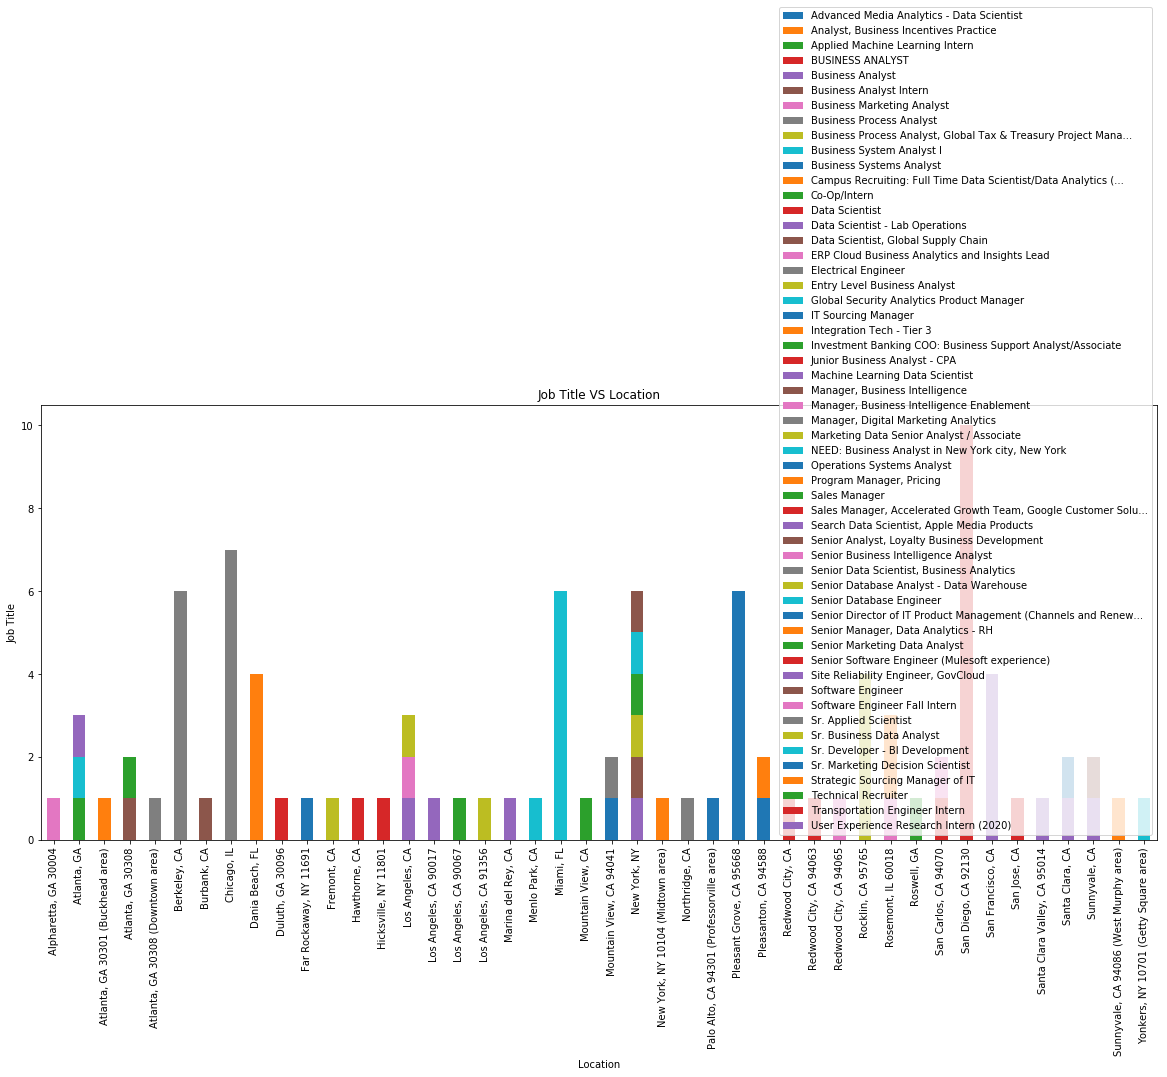

In [3]:
import pandas as pd
data_temp = pd.read_csv('records_home.csv',encoding='latin-1')
ct=pd.crosstab(data_temp['Location'],data_temp['Title'])
sfg = ct.plot.bar(figsize=(20,8),stacked=True,title='Job Title VS Location')
sfg.legend(loc='top right')
sfg.set_ylabel("Job Title")

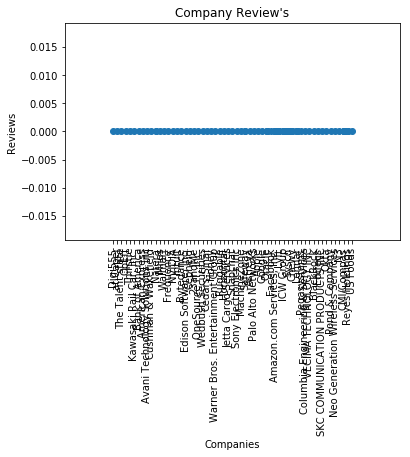

In [4]:
import re
import matplotlib.pyplot as plt
lstd = []
for x in data_temp['Reviews']:
    if x == 'Not Available':
        x = 0
        lstd.append(x)
    else:
        regh = re.compile(r"[0-9,]+")
        jk = regh.findall(x)
        jk[0] = jk[0].replace(',','')
        lstd.append(int(jk[0]))
company =plt.scatter(data_temp['Company'], lstd)
plt.xticks(rotation='vertical')
plt.margins(0.2)
plt.xlabel("Companies")
plt.ylabel("Reviews")
plt.title("Company Review's")
plt.show()

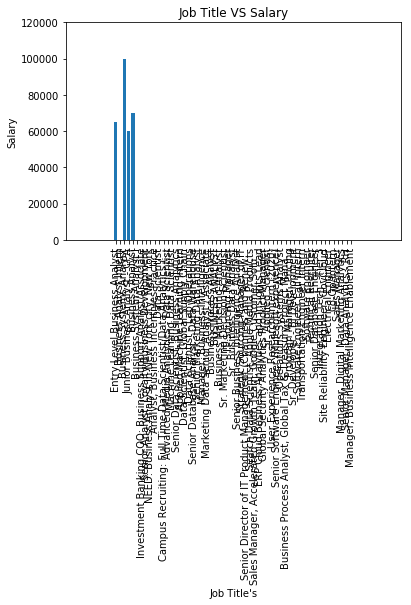

In [5]:
import matplotlib.pyplot as plt
kp = []
for y in data_temp['Salary']:
    if y == 'Not Available':
        y = 0
        kp.append(y)
    else:
        reio = re.compile(r"[0-9,]+")
        jkl = reio.findall(y)
        jkl[0] = jkl[0].replace(',','')
        jkl[1] = jkl[1].replace(',','')
        j = max(jkl[0], jkl[1])
        kp.append(int(jkl[0]))
salary_max =plt.bar(data_temp['Title'], kp)
plt.xticks(rotation='vertical')
plt.margins(0.2)
plt.xlabel("Job Title's")
plt.ylabel("Salary")
plt.title("Job Title VS Salary")
plt.show()